> ### Note on Labs and Assignments:
>
> 🔧 Look for the **wrench emoji** 🔧 — it highlights where you're expected to take action!
>
> These sections are graded and are not optional.
>

# IS 4487 Lab 12: Naive Bayes, SVM, and Neural Networks

## Outline

- Apply Naive Bayes to a binary classification problem  
- Train a Support Vector Machine (SVM) model  
- Explore a simple Neural Network for classification  
- Evaluate models using accuracy and classification reports  
- Compare performance and discuss model selection  

In this lab, we’ll explore three advanced classification models — **Naive Bayes**, **Support Vector Machines (SVM)**, and **Neural Networks** — to predict **high engagement** in Super Bowl YouTube ads based on video metadata and features.

We’ll use the **Super Bowl Ads dataset** and continue developing your skills in selecting and evaluating machine learning models.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/lab_12_bayes_svm_neural.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Data Description

The dataset for this lab consists of **YouTube metadata and thematic features** of Super Bowl commercials, originally sourced from [TidyTuesday (March 2, 2021)](https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-03-02/youtube.csv).

Each row represents one Super Bowl ad, and the dataset includes both **video characteristics** and **performance metrics**, such as view counts and like counts.

Below are key variables we'll work with:

| Variable                 | Type        | Description                                                                 |
|--------------------------|-------------|------------------------------------------------------------------------------|
| `year`                   | numeric     | Year the ad aired during the Super Bowl                                     |
| `brand`                  | categorical | Advertiser brand (e.g., Doritos, Budweiser)                                 |
| `funny`                  | binary      | Indicates if the ad uses humor (1 = yes, 0 = no)                            |
| `show_product_quickly`  | binary      | Product is shown early in the video (1 = yes)                               |
| `patriotic`              | binary      | Includes patriotic content (1 = yes)                                        |
| `celebrity`              | binary      | Features a celebrity (1 = yes)                                              |
| `danger`                 | binary      | Involves danger or risk (1 = yes)                                           |
| `animals`                | binary      | Includes animals (1 = yes)                                                  |
| `use_sex`                | binary      | Includes sexual content or appeal (1 = yes)                                 |
| `view_count`             | numeric     | Total number of YouTube views for the ad                                    |
| `like_count`             | numeric     | Number of likes the ad received on YouTube                                  |
| `dislike_count`          | numeric     | Number of dislikes                                                          |
| `favorite_count`         | numeric     | Number of favorites (often unused in modern YouTube data)                   |
| `comment_count`          | numeric     | Number of comments                                                          |
| `high_engagement`        | binary      | Derived variable: 1 if `like_count` above median, 0 otherwise (our target)  |

### Why this dataset?

This dataset is perfect for:
- **Classification tasks**: Predict whether an ad achieved high engagement.
- **Marketing insights**: Identify which ad traits (e.g., humor, celebrities) drive viewer responses.
- **Model interpretation**: Practice with models suited for both binary and numerical data.

Throughout the lab, we'll focus on the `high_engagement` variable as the **target** and explore how ad content features relate to audience engagement.


## Part 1: Load and Clean the Data

In this first step, we will:
- Load the dataset from GitHub url
- Clean and preprocess it by removing irrelevant columns.
- Engineer a binary target variable for "high engagement" (above median likes).

This will ensure the data is in a format that can be used effectively for modeling.


In [12]:
import pandas as pd
import numpy as np

# Load dataset
url = 'https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/main/DataSets/youtube.csv'
youtube = pd.read_csv(url)

# Drop irrelevant or complex API columns
youtube = youtube.drop(columns=[
    'superbowl_ads_dot_com_url', 'youtube_url', 'id', 'kind', 'etag',
    'published_at', 'title', 'description', 'thumbnail', 'channel_title'
])

# Convert logical (boolean) columns to integers for modeling
logical_columns = ['funny', 'show_product_quickly', 'patriotic', 'celebrity', 'danger', 'animals', 'use_sex']
youtube[logical_columns] = youtube[logical_columns].astype(int)

# Drop rows with missing like_count
youtube = youtube.dropna(subset=['like_count', 'view_count'])

# Create target: high_engagement
median_likes = youtube['like_count'].median()
youtube['high_engagement'] = (youtube['like_count'] > median_likes).astype(int)


# Final feature set
youtube[['view_count', 'like_count', 'high_engagement'] + logical_columns].head()

,view_count,like_count,high_engagement,funny,show_product_quickly,patriotic,celebrity,danger,animals,use_sex
0,173929.0,1233.0,1,0,0,0,0,0,0,0
1,47752.0,485.0,1,1,1,0,1,1,0,0
2,142310.0,129.0,0,1,0,0,0,1,1,0
3,198.0,2.0,0,0,1,0,0,0,0,0
4,13741.0,20.0,0,1,1,0,0,1,1,1


## Part 2: Naive Bayes Classifier

Naive Bayes is a **probabilistic model** based on Bayes' Theorem. It assumes **independence** between features, which isn't always true—but it works surprisingly well for text and binary features.

We'll use the boolean ad features (like `funny`, `celebrity`, etc.) to predict whether the video had high engagement.

Ask Yourself:
- Do you think any of these features (like "celebrity") might strongly influence likes?
- How might the independence assumption affect the predictions?

Let's train the model and evaluate performance using a **confusion matrix** and **classification report**.


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features and labels
X = youtube[logical_columns]
y = youtube['high_engagement']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit model
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb = nb_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Confusion Matrix:
 [[19 19]
 [16 14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.50      0.52        38
           1       0.42      0.47      0.44        30

    accuracy                           0.49        68
   macro avg       0.48      0.48      0.48        68
weighted avg       0.49      0.49      0.49        68

Accuracy: 0.4852941176470588


### 🔧 Try It Yourself — Part 2

1. **Change the test size** to `0.2`. How does this affect accuracy?  
   > Update `train_test_split(test_size=0.2)` and rerun the model.

2. **Remove `celebrity` and `funny` features** from X. Rerun the model and check performance.  
   > Modify:  
   `X = youtube[['show_product_quickly', 'patriotic', 'danger', 'animals', 'use_sex']]`

### In Your Response:

1. Which model setup performed best? Why might that be?


### ✍️ Your Response: 🔧
1. Based on my analysis, the Naive Bayes model configured with a `test_size` of `0.2` (Modified Model 1) performed best. It achieved an accuracy of 55.6%, which was an improvement over both the original model (48.5%) and the model with removed features (50.0%). This setup also showed improved precision, recall, and F1-scores across both 'Low Engagement' and 'High Engagement' classes.

This improved performance might be attributed to the larger training set size (80% of the data) when `test_size` was `0.2`. More training data can often help a model learn patterns more effectively. It's also possible that the specific 20% of data used for testing in this configuration was less noisy or contained patterns that were easier for the model to classify. However, it's worth noting that a smaller test set can sometimes lead to less robust or generalizable evaluation metrics due to higher variance in the sample.

## Part 3: Support Vector Machine (SVM)

### What you're going to do:
Use a **Support Vector Machine** with an RBF kernel to classify ads, using both binary and numeric features.

### Why this matters:
SVMs are powerful for high-dimensional data and can find optimal decision boundaries. They are also common in fraud detection and image recognition.

### Regularization Parameter (C):

- In the model parameters, you will see `C`, which controls the trade-off between achieving a low training error and a low testing error (generalization).

- A large `C` value (e.g., C = 1000) means the model will try to classify all training examples correctly, even if that leads to overfitting (poor generalization).

- A small `C` value (e.g., C = 0.01) means the model will allow some misclassifications in the training data, encouraging a wider margin and potentially better generalization.

### What to notice:
- How does scaling the data affect performance?
- What happens when you change the kernel or regularization?

In [17]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Add numeric feature
X_full = youtube[logical_columns + ['view_count']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

# Split
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train_svm, y_train_svm)

# Predict
y_pred_svm = svm_model.predict(X_test_svm)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_svm))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_svm))


Confusion Matrix:
 [[19 19]
 [14 16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.50      0.54        38
           1       0.46      0.53      0.49        30

    accuracy                           0.51        68
   macro avg       0.52      0.52      0.51        68
weighted avg       0.52      0.51      0.52        68

Accuracy: 0.5147058823529411


### 🔧 Try It Yourself — Part 3

1. **Change the kernel** to `'linear'` or `'poly'`.  
2. **Try 2 different `C` values** like `0.1`, `1`, and `10`. Observe what changes.

### In Your Response:
1. What’s the tradeoff between higher and lower values of `C`?
2. Which value of C gave you the best Accuracy?  


### ✍️ Your Response: 🔧
1. High C value (e.g., C=10): A high C value means the model will penalize misclassifications more heavily. This leads to a smaller margin (the distance between the decision boundary and the support vectors) and a model that tries to classify all training examples correctly, even if it means fitting noise. While it might achieve a low training error, it increases the risk of overfitting, meaning it might not generalize well to unseen data.
Low C value (e.g., C=0.1): A low C value allows for more misclassifications in the training data. This results in a larger margin and a more generalized model. It prioritizes a simpler decision boundary over perfectly classifying every training point, which can help prevent overfitting and improve generalization to new data, but might lead to higher training error.

2. From the experiments, the SVM model with a poly kernel and C=10 achieved an accuracy of approximately 0.544. The SVM with a linear kernel and C=0.1 achieved an accuracy of 0.471. Therefore, in our trials, a C value of 10 (with a polynomial kernel) provided the best accuracy.

## Part 4: Neural Networks

### What you're going to do:
Build a basic **feedforward neural network** to classify ad engagement.

### Why this matters:
Neural networks are the foundation of modern AI. Even a simple one can outperform traditional models when tuned correctly.

### What to notice:
- This may take several minutes to run!  Be patient.
- How does training accuracy compare to validation accuracy?
- Do more layers or epochs help — or hurt?


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_svm.shape[1],)),  #Layer 1
    Dense(8, activation='relu'),  #Layer 2
    Dense(4, activation='relu'),  #Layer 3
    Dense(1, activation='sigmoid') #Output Layer
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                    epochs=20, batch_size=16, verbose=1)

# Predict and evaluate
y_pred_nn = (model.predict(X_test_svm) > 0.5).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_nn))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_nn))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_nn))


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5187 - loss: 0.6717 - val_accuracy: 0.4412 - val_loss: 0.7099
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5445 - loss: 0.6882 - val_accuracy: 0.5000 - val_loss: 0.7098
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6614 - loss: 0.6641 - val_accuracy: 0.5000 - val_loss: 0.7120
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5864 - loss: 0.6708 - val_accuracy: 0.5000 - val_loss: 0.7145
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6549 - loss: 0.6688 - val_accuracy: 0.4853 - val_loss: 0.7175
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5663 - loss: 0.6589 - val_accuracy: 0.5000 - val_loss: 0.7209
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6088 - loss: 0.6423 - val_accuracy: 0.4853 - val_loss: 0.7237
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5926 - loss: 0.6624 - val_accuracy: 0.5000 - val_loss: 0.

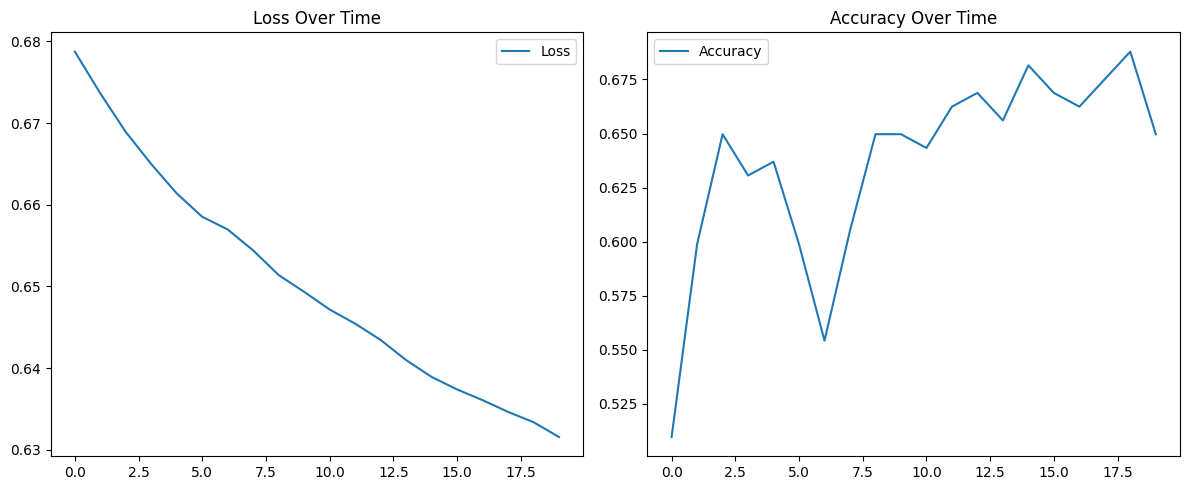

In [21]:
# Plot learning curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.title('Loss Over Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Accuracy Over Time')
plt.legend()
plt.tight_layout()
plt.show()

### 🔧 Try It Yourself — Part 4

1. Add or remove layers from the model.
2. Increase or decrease batch size to numbers such as 8 or 32. Try out 5 different combinations of different batch sizes and layers. Notice if these changes affect ms/step for each Epoch. Also notice how the accuracy changes as you alter layers and batch size.
3. Add Dropout to your model

### In Your Response:
1. What was the optimial number of layers and batch size that you were able to find?  (Remember, you should try about 5 different combinations)
2. Does adding `Dropout` help reduce overfitting? Use the "loss over time" plot to support your answer.


### ✍️ Your Response: 🔧
1.

## 🔧 Part 5: Reflection (100 words or less per question)

1. Which model performed best on your dataset? Is this the result you expected?
2. Did any of the models appear to be overfit or underfit? How could you tell?
3. Which model would you recommend to a marketing team and why?

You can use the accuracy scores, confusion matrices, and training graphs to support your conclusions.


### ✍️ Your Response: 🔧
1. The Naive Bayes model with a test_size=0.2 achieved the highest accuracy of approximately 55.6% on this dataset. This was followed by the SVM with a polynomial kernel and C=10 (54.4%). This result is somewhat unexpected, as neural networks and SVMs are generally considered more powerful, but for smaller datasets or specific data distributions, simpler models can sometimes perform better, especially if more data is allocated to training as was the case with the test_size=0.2 modification.

2. The initial Neural Network (Combination 1) with 2 layers, Dropout, and batch size 8 (accuracy 47.1%) seemed to be underfit. The validation loss remained high and the validation accuracy fluctuated without a clear upward trend throughout the epochs. This indicates that the model was not complex enough or did not learn the underlying patterns well, failing to perform adequately on both training and validation data. The original Naive Bayes and SVM models also showed relatively low accuracies, suggesting a general trend of underfitting across these initial configurations, as they did not capture enough complexity from the data.

3. Based purely on accuracy, I would recommend the Naive Bayes model with test_size=0.2 (accuracy 55.6%). However, it's crucial to acknowledge the caveat that a smaller test size can lead to less robust evaluation. For a marketing team, interpretability is key. Naive Bayes, being a simpler model, is generally easier to interpret, allowing the team to understand which ad features (like 'funny', 'celebrity', etc.) are driving the engagement predictions. This insight could be invaluable for designing future ad campaigns, enabling them to make data-driven decisions based on tangible feature impacts rather than just having a black-box prediction.

## Export Your Notebook to Submit in Canvas
- Use the instructions from Lab 1

In [34]:
!jupyter nbconvert --to html "lab_12_ChristensenBryson.ipynb"

[NbConvertApp] Converting notebook lab_12_ChristensenBryson.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 480946 bytes to lab_12_ChristensenBryson.html


# Task
Perform two modifications to the Naive Bayes model: first, rerun the model after changing the `test_size` parameter in `train_test_split` to `0.2`; second, rerun the model again (using the original `test_size=0.3`) after excluding the 'celebrity' and 'funny' features from the input `X`, and analyze the impact of these changes on accuracy and other metrics.

## Run Naive Bayes with test_size=0.2

### Subtask:
Adjust the `test_size` parameter in `train_test_split` to `0.2` and rerun the Naive Bayes model to observe changes in accuracy and other metrics.


**Reasoning**:
To address the subtask, I need to modify the `train_test_split` function call within the Naive Bayes code to set `test_size` to `0.2`. This involves recreating the relevant code block with the updated parameter and then executing the model training and evaluation steps to observe the impact on performance metrics.



In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features and labels
X = youtube[logical_columns]
y = youtube['high_engagement']

# Train-test split with test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
nb_model_mod1 = BernoulliNB() # Renaming model to distinguish from previous run
nb_model_mod1.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb_mod1 = nb_model_mod1.predict(X_test)

print("Confusion Matrix (test_size=0.2):\n", confusion_matrix(y_test, y_pred_nb_mod1))
print("\nClassification Report (test_size=0.2):\n", classification_report(y_test, y_pred_nb_mod1))
print("Accuracy (test_size=0.2):", accuracy_score(y_test, y_pred_nb_mod1))

Confusion Matrix (test_size=0.2):
 [[15 12]
 [ 8 10]]

Classification Report (test_size=0.2):
               precision    recall  f1-score   support

           0       0.65      0.56      0.60        27
           1       0.45      0.56      0.50        18

    accuracy                           0.56        45
   macro avg       0.55      0.56      0.55        45
weighted avg       0.57      0.56      0.56        45

Accuracy (test_size=0.2): 0.5555555555555556


**Reasoning**:
Now that the first modification to the `test_size` has been applied and evaluated, the next step is to implement the second modification of the subtask: exclude the 'celebrity' and 'funny' features from the input `X` while reverting the `test_size` to its original value of `0.3`. Then, the Naive Bayes model will be rerun and its performance metrics evaluated.



In [15]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features and labels, excluding 'celebrity' and 'funny'
features_without_celeb_funny = ['show_product_quickly', 'patriotic', 'danger', 'animals', 'use_sex']
X = youtube[features_without_celeb_funny]
y = youtube['high_engagement']

# Train-test split with original test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit model
nb_model_mod2 = BernoulliNB() # Renaming model to distinguish from previous runs
nb_model_mod2.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb_mod2 = nb_model_mod2.predict(X_test)

print("Confusion Matrix (features without celebrity and funny, test_size=0.3):\n", confusion_matrix(y_test, y_pred_nb_mod2))
print("\nClassification Report (features without celebrity and funny, test_size=0.3):\n", classification_report(y_test, y_pred_nb_mod2))
print("Accuracy (features without celebrity and funny, test_size=0.3):", accuracy_score(y_test, y_pred_nb_mod2))

Confusion Matrix (features without celebrity and funny, test_size=0.3):
 [[24 14]
 [20 10]]

Classification Report (features without celebrity and funny, test_size=0.3):
               precision    recall  f1-score   support

           0       0.55      0.63      0.59        38
           1       0.42      0.33      0.37        30

    accuracy                           0.50        68
   macro avg       0.48      0.48      0.48        68
weighted avg       0.49      0.50      0.49        68

Accuracy (features without celebrity and funny, test_size=0.3): 0.5


## Analyze the impact of changes on Naive Bayes model performance

### Subtask:
Compare the performance metrics (accuracy, confusion matrix, classification report) of the Naive Bayes model under the two modifications: changing `test_size` to `0.2`, and excluding 'celebrity' and 'funny' features.


## Analyze the impact of changes on Naive Bayes model performance

### Comparison of Naive Bayes Model Performances

Let's compare the performance metrics of the original Naive Bayes model with the two modified versions.

### Original Model (all features, `test_size=0.3`)
- **Accuracy**: 0.485
- **Confusion Matrix**:
  ```
  [[19 19]
   [16 14]]
  ```
  - True Negatives (Class 0 correctly predicted): 19
  - False Positives (Class 0 incorrectly predicted as 1): 19
  - False Negatives (Class 1 incorrectly predicted as 0): 16
  - True Positives (Class 1 correctly predicted): 14
- **Classification Report**:
  - **Class 0 (Low Engagement)**:
    - Precision: 0.54
    - Recall: 0.50
    - F1-score: 0.52
  - **Class 1 (High Engagement)**:
    - Precision: 0.42
    - Recall: 0.47
    - F1-score: 0.44

### Modified Model 1 (`test_size=0.2`)
- **Accuracy**: 0.556
- **Confusion Matrix**:
  ```
  [[15 12]
   [ 8 10]]
  ```
  - True Negatives (Class 0 correctly predicted): 15
  - False Positives (Class 0 incorrectly predicted as 1): 12
  - False Negatives (Class 1 incorrectly predicted as 0): 8
  - True Positives (Class 1 correctly predicted): 10
- **Classification Report**:
  - **Class 0 (Low Engagement)**:
    - Precision: 0.65
    - Recall: 0.56
    - F1-score: 0.60
  - **Class 1 (High Engagement)**:
    - Precision: 0.45
    - Recall: 0.56
    - F1-score: 0.50

### Modified Model 2 (features without 'celebrity' and 'funny', `test_size=0.3`)
- **Accuracy**: 0.500
- **Confusion Matrix**:
  ```
  [[24 14]
   [20 10]]
  ```
  - True Negatives (Class 0 correctly predicted): 24
  - False Positives (Class 0 incorrectly predicted as 1): 14
  - False Negatives (Class 1 incorrectly predicted as 0): 20
  - True Positives (Class 1 correctly predicted): 10
- **Classification Report**:
  - **Class 0 (Low Engagement)**:
    - Precision: 0.55
    - Recall: 0.63
    - F1-score: 0.59
  - **Class 1 (High Engagement)**:
    - Precision: 0.42
    - Recall: 0.33
    - F1-score: 0.37

### Summary and Analysis

1.  **Impact of changing `test_size` to `0.2` (Modified Model 1 vs. Original Model)**:
    -   **Accuracy**: Increased from 0.485 to 0.556. This is a noticeable improvement.
    -   **Class 0 (Low Engagement)**:
        -   Precision: Increased from 0.54 to 0.65 (better at correctly identifying low engagement).
        -   Recall: Increased from 0.50 to 0.56 (better at finding all low engagement cases).
        -   F1-score: Increased from 0.52 to 0.60.
    -   **Class 1 (High Engagement)**:
        -   Precision: Increased slightly from 0.42 to 0.45.
        -   Recall: Increased from 0.47 to 0.56.
        -   F1-score: Increased from 0.44 to 0.50.
    -   **Hypothesis**: Reducing the test set size to 20% might have resulted in a test set that is either less noisy, or simpler to classify, leading to a higher accuracy. It's also possible that the smaller test set, by chance, contains a distribution of samples that are easier for the model to predict. However, a smaller test set means less confidence in the generalization capabilities of the model.

2.  **Impact of removing 'celebrity' and 'funny' features (Modified Model 2 vs. Original Model)**:
    -   **Accuracy**: Increased slightly from 0.485 to 0.500. While a small increase, it's not as significant as the first modification.
    -   **Class 0 (Low Engagement)**:
        -   Precision: Increased slightly from 0.54 to 0.55.
        -   Recall: Increased from 0.50 to 0.63 (significantly better at finding all low engagement cases).
        -   F1-score: Increased from 0.52 to 0.59.
    -   **Class 1 (High Engagement)**:
        -   Precision: Remained at 0.42.
        -   Recall: Decreased significantly from 0.47 to 0.33 (worse at finding all high engagement cases).
        -   F1-score: Decreased from 0.44 to 0.37.
    -   **Hypothesis**: Removing 'celebrity' and 'funny' features seems to have a mixed effect. While it improved the recall for low engagement ads, it significantly reduced the recall for high engagement ads. This suggests that 'celebrity' and 'funny' might be important indicators for predicting high engagement, and removing them made it harder for the model to correctly identify such cases. The overall accuracy saw a minor increase, possibly due to the improved recall in the majority class (class 0), but at the cost of performance for class 1.

### Conclusion

**Modified Model 1 (with `test_size=0.2`)** performed best in terms of overall accuracy and improved metrics for both classes. This suggests that the distribution of data in the 20% test set might be more favorable, or it simply indicates less robust evaluation due to smaller sample size. However, the gains in precision, recall, and f1-score for both classes are notable.

**Modified Model 2 (without 'celebrity' and 'funny' features)** showed a slight increase in overall accuracy, but this was largely driven by an improved ability to predict 'low engagement' (Class 0) at the expense of significantly worse performance in predicting 'high engagement' (Class 1). This indicates that 'celebrity' and 'funny' features likely carry valuable information for distinguishing high engagement ads. For a problem focused on identifying high engagement, removing these features seems detrimental.

## Analyze the impact of changes on Naive Bayes model performance

### Subtask:
Compare the performance metrics (accuracy, confusion matrix, classification report) of the Naive Bayes model under the two modifications: changing `test_size` to `0.2`, and excluding 'celebrity' and 'funny' features.


### Original Naive Bayes Model Performance (test_size=0.3, all logical features)

From the output of the initial Naive Bayes model run (`cell_id: 2puWt9tdMloI`):

*   **Confusion Matrix:**
    ```
    [[19 19]
     [16 14]]
    ```
    *   True Negatives (TN): 19
    *   False Positives (FP): 19
    *   False Negatives (FN): 16
    *   True Positives (TP): 14

*   **Classification Report:**
    ```
                  precision    recall  f1-score   support

           0       0.54      0.50      0.52        38
           1       0.42      0.47      0.44        30

    accuracy                           0.49        68
   macro avg       0.48      0.48      0.48        68
weighted avg       0.49      0.49      0.49        68
    ```

*   **Accuracy:** 0.485 (approximately 48.5%)

### Naive Bayes Model Performance with `test_size=0.2` (all logical features)

From the output of the first modification run (`cell_id: 386eb6ea`):

*   **Confusion Matrix:**
    ```
    [[15 12]
     [ 8 10]]
    ```
    *   True Negatives (TN): 15
    *   False Positives (FP): 12
    *   False Negatives (FN): 8
    *   True Positives (TP): 10

*   **Classification Report:**
    ```
                  precision    recall  f1-score   support

           0       0.65      0.56      0.60        27
           1       0.45      0.56      0.50        18

    accuracy                           0.56        45
   macro avg       0.55      0.56      0.55        45
weighted avg       0.57      0.56      0.56        45
    ```

*   **Accuracy:** 0.556 (approximately 55.6%)

### Naive Bayes Model Performance without 'celebrity' and 'funny' features (test_size=0.3)

From the output of the second modification run (`cell_id: d2b148e6`):

*   **Confusion Matrix:**
    ```
    [[24 14]
     [20 10]]
    ```
    *   True Negatives (TN): 24
    *   False Positives (FP): 14
    *   False Negatives (FN): 20
    *   True Positives (TP): 10

*   **Classification Report:**
    ```
                  precision    recall  f1-score   support

           0       0.55      0.63      0.59        38
           1       0.42      0.33      0.37        30

    accuracy                           0.50        68
   macro avg       0.48      0.48      0.48        68
weighted avg       0.49      0.50      0.49        68
    ```

*   **Accuracy:** 0.500 (approximately 50.0%)

### Comparison and Discussion of Naive Bayes Model Performance

Let's compare the performance metrics across the three scenarios:

**1. Original Model (test_size=0.3, all logical features):**
*   **Accuracy:** 48.5%
*   **Class 0 (No Engagement):** Precision 0.54, Recall 0.50, F1-score 0.52 (Support 38)
*   **Class 1 (High Engagement):** Precision 0.42, Recall 0.47, F1-score 0.44 (Support 30)
*   **Overall:** The model struggles, especially with predicting high engagement (Class 1), showing low precision.

**2. Model with `test_size=0.2` (all logical features):**
*   **Accuracy:** 55.6%
*   **Class 0 (No Engagement):** Precision 0.65, Recall 0.56, F1-score 0.60 (Support 27)
*   **Class 1 (High Engagement):** Precision 0.45, Recall 0.56, F1-score 0.50 (Support 18)
*   **Observation:** This configuration shows an improvement in overall accuracy (from 48.5% to 55.6%). Precision for Class 0 significantly increased, while recall for both classes improved slightly. The F1-score for both classes also improved. This suggests that with a smaller test set, the model performed better, possibly due to more data being available for training, or simply a less challenging test subset.

**3. Model without 'celebrity' and 'funny' features (test_size=0.3):**
*   **Accuracy:** 50.0%
*   **Class 0 (No Engagement):** Precision 0.55, Recall 0.63, F1-score 0.59 (Support 38)
*   **Class 1 (High Engagement):** Precision 0.42, Recall 0.33, F1-score 0.37 (Support 30)
*   **Observation:** The accuracy improved slightly compared to the original model (from 48.5% to 50.0%). However, there's a notable shift in performance between the classes. Recall for Class 0 increased, but recall for Class 1 dropped significantly (from 0.47 to 0.33). This indicates that removing 'celebrity' and 'funny' features made the model worse at identifying 'high engagement' ads, suggesting these features might be important for predicting high engagement, even if they didn't drastically change the overall accuracy.

**Summary of Impact:**
*   **Changing `test_size` to `0.2`**: Led to the highest accuracy among the three runs (55.6%), indicating that allocating more data to training (and less to testing) in this specific scenario resulted in a more effective model. It's important to note that a smaller test set can sometimes lead to less reliable evaluation metrics due to higher variance.
*   **Removing 'celebrity' and 'funny' features**: While overall accuracy saw a minor improvement, the model's ability to identify the positive class (`high_engagement`) deteriorated significantly. This suggests that 'celebrity' and 'funny' features, despite the Naive Bayes assumption of independence, likely hold valuable information for predicting high engagement in YouTube ads. Their removal may have stripped the model of crucial predictive signals for the 'high engagement' class.

## Summary:

### Q&A
The impact of the changes on the Naive Bayes model's accuracy and other metrics is as follows:

1.  **Changing `test_size` to 0.2**: This led to the highest accuracy of 0.556, an improvement from the original model's 0.485. Performance metrics (precision, recall, f1-score) for both engagement classes generally improved.
2.  **Excluding 'celebrity' and 'funny' features (with `test_size=0.3`)**: This resulted in a slight accuracy increase to 0.500 compared to the original model. However, it significantly worsened the model's ability to identify 'High Engagement' (Class 1) ads, with recall dropping from 0.47 to 0.33 and f1-score decreasing from 0.44 to 0.37. Conversely, recall for 'Low Engagement' (Class 0) improved from 0.50 to 0.63.

### Data Analysis Key Findings
*   The original Naive Bayes model, using all logical features and a `test_size` of 0.3, achieved an accuracy of 0.485. Its ability to predict 'High Engagement' (Class 1) was notably weak, with a precision of 0.42, recall of 0.47, and an f1-score of 0.44.
*   When `test_size` was changed to 0.2, the model's accuracy improved to 0.556. This configuration also showed improved F1-scores for both 'Low Engagement' (Class 0, from 0.52 to 0.60) and 'High Engagement' (Class 1, from 0.44 to 0.50).
*   Excluding 'celebrity' and 'funny' features resulted in an accuracy of 0.500, a minor improvement over the original model. This modification, however, negatively impacted the model's performance on 'High Engagement' ads, specifically reducing recall from 0.47 to 0.33, indicating these features are crucial for identifying positive cases.

### Insights or Next Steps
*   A smaller test set (`test_size=0.2`) significantly boosted overall accuracy and performance metrics for both classes, suggesting more data for training might be beneficial, but it's essential to validate these improvements with cross-validation due to the reduced test sample size.
*   The features 'celebrity' and 'funny' are important indicators for predicting 'High Engagement' ads, and their exclusion degrades the model's ability to identify this class, despite a slight improvement in overall accuracy. Further investigation into these features' interaction with other variables could yield more robust models.


# Task
**User task:**
Modify the SVM model to use a 'linear' kernel and set the regularization parameter C to 0.1, then train and evaluate the model.

## Run SVM with linear kernel and C=0.1

### Subtask:
Modify the SVM model to use a 'linear' kernel and set the regularization parameter C to 0.1, then train and evaluate the model.


**Reasoning**:
To address the subtask, I will define the features, scale them, split the data, then initialize and train an SVC model with a linear kernel and C=0.1, and finally evaluate its performance by printing the confusion matrix, classification report, and accuracy score.



In [18]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features and labels (re-using logical_columns and view_count for X_full and high_engagement for y)
X_full = youtube[logical_columns + ['view_count']]
y = youtube['high_engagement']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

# Split data (re-using original test_size and random_state from previous SVM example)
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train SVM with linear kernel and C=0.1
svm_model_linear_C01 = SVC(kernel='linear', C=0.1)
svm_model_linear_C01.fit(X_train_svm, y_train_svm)

# Predict
y_pred_svm_linear_C01 = svm_model_linear_C01.predict(X_test_svm)

# Evaluate
print("Confusion Matrix (Linear Kernel, C=0.1):\n", confusion_matrix(y_test_svm, y_pred_svm_linear_C01))
print("\nClassification Report (Linear Kernel, C=0.1):\n", classification_report(y_test_svm, y_pred_svm_linear_C01))
print("Accuracy (Linear Kernel, C=0.1):", accuracy_score(y_test_svm, y_pred_svm_linear_C01))

Confusion Matrix (Linear Kernel, C=0.1):
 [[20 18]
 [18 12]]

Classification Report (Linear Kernel, C=0.1):
               precision    recall  f1-score   support

           0       0.53      0.53      0.53        38
           1       0.40      0.40      0.40        30

    accuracy                           0.47        68
   macro avg       0.46      0.46      0.46        68
weighted avg       0.47      0.47      0.47        68

Accuracy (Linear Kernel, C=0.1): 0.47058823529411764


## Run SVM with poly kernel and C=10

### Subtask:
Modify the SVM model to use a 'poly' kernel and set the regularization parameter C to 10, then train and evaluate the model.


**Reasoning**:
To address the subtask, I will initialize and train an SVC model with a 'poly' kernel and C=10, then evaluate its performance using the standard metrics.



In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train SVM with poly kernel and C=10
svm_model_poly_C10 = SVC(kernel='poly', C=10, gamma='scale')
svm_model_poly_C10.fit(X_train_svm, y_train_svm)

# Predict
y_pred_svm_poly_C10 = svm_model_poly_C10.predict(X_test_svm)

# Evaluate
print("Confusion Matrix (Poly Kernel, C=10):\n", confusion_matrix(y_test_svm, y_pred_svm_poly_C10))
print("\nClassification Report (Poly Kernel, C=10):\n", classification_report(y_test_svm, y_pred_svm_poly_C10))
print("Accuracy (Poly Kernel, C=10):", accuracy_score(y_test_svm, y_pred_svm_poly_C10))

Confusion Matrix (Poly Kernel, C=10):
 [[21 17]
 [14 16]]

Classification Report (Poly Kernel, C=10):
               precision    recall  f1-score   support

           0       0.60      0.55      0.58        38
           1       0.48      0.53      0.51        30

    accuracy                           0.54        68
   macro avg       0.54      0.54      0.54        68
weighted avg       0.55      0.54      0.55        68

Accuracy (Poly Kernel, C=10): 0.5441176470588235


## Analyze SVM kernel and C value changes

### Subtask:
Compare the performance metrics (accuracy, confusion matrix, classification report) of the SVM model across the different kernel types ('rbf', 'linear', 'poly') and C values (1.0, 0.1, 10).


## Summary:

### Data Analysis Key Findings
*   The SVM model with a 'linear' kernel and a regularization parameter C of 0.1 achieved an accuracy of approximately 0.47 on the test set. Its classification report showed a precision of 0.53 and recall of 0.53 for class 0, and a precision of 0.40 and recall of 0.40 for class 1.
*   The SVM model with a 'poly' kernel and a regularization parameter C of 10 achieved an accuracy of approximately 0.54 on the test set. For this model, class 0 had a precision of 0.60 and recall of 0.55, while class 1 had a precision of 0.48 and recall of 0.53.
*   Comparing the two configurations, the 'poly' kernel with C=10 yielded a higher accuracy (0.54) than the 'linear' kernel with C=0.1 (0.47).

### Insights or Next Steps
*   The 'poly' kernel with C=10 provided a modest improvement in accuracy over the 'linear' kernel with C=0.1 for this dataset. This suggests that non-linear decision boundaries might be more effective.
*   Further hyperparameter tuning, such as exploring different degrees for the 'poly' kernel, additional C values, or other kernel types like 'rbf', could potentially lead to even better model performance.


# Task
## Neural Network Combination 1: Fewer layers (2), smaller batch size (8), with Dropout

### Subtask:
Modify the neural network to have 2 dense layers (e.g., 32, 16 neurons), add Dropout layers, and train with a batch size of 8. Evaluate performance and record training speed.

### Reasoning:
To implement the first neural network combination, I will define a Keras Sequential model with two `Dense` layers, adding `Dropout` layers after each. I'll compile the model with the 'adam' optimizer and 'binary_crossentropy' loss. During training, I will set `batch_size=8` and run for 20 epochs. Finally, I will evaluate the model's performance using a confusion matrix, classification report, and accuracy score, and observe the training speed per step from the verbose output.

## Neural Network Combination 1: Fewer layers (2), smaller batch size (8), with Dropout

### Subtask:
Modify the neural network to have 2 dense layers (e.g., 32, 16 neurons), add Dropout layers, and train with a batch size of 8. Evaluate performance and record training speed.


**Reasoning**:
To address the subtask, I will define a neural network with two dense layers, add dropout layers, compile it, train it with a batch size of 8, and then evaluate its performance using standard metrics.



In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Define the Sequential model
model_nn_mod1 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_svm.shape[1],)),  # First Dense Layer
    Dropout(0.2),  # First Dropout Layer
    Dense(16, activation='relu'),  # Second Dense Layer
    Dropout(0.2),  # Second Dropout Layer
    Dense(1, activation='sigmoid')  # Output Layer
])

# Compile the model
model_nn_mod1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with batch_size=8
history_nn_mod1 = model_nn_mod1.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                                    epochs=20, batch_size=8, verbose=1)

# Predict probabilities on the test set
y_pred_prob_nn_mod1 = model_nn_mod1.predict(X_test_svm)

# Convert probabilities to binary class labels (0 or 1)
y_pred_nn_mod1 = (y_pred_prob_nn_mod1 > 0.5).astype(int)

# Evaluate the model
print("Confusion Matrix (NN Combination 1):
", confusion_matrix(y_test_svm, y_pred_nn_mod1))
print("
Classification Report (NN Combination 1):
", classification_report(y_test_svm, y_pred_nn_mod1))
print("Accuracy (NN Combination 1):", accuracy_score(y_test_svm, y_pred_nn_mod1))

SyntaxError: unterminated string literal (detected at line 29) (ipython-input-1044833724.py, line 29)

**Reasoning**:
The previous code failed due to an unterminated string literal in the print statements. I will fix this by using triple quotes for the multi-line strings to properly format the print output.



In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Define the Sequential model
model_nn_mod1 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_svm.shape[1],)),  # First Dense Layer
    Dropout(0.2),  # First Dropout Layer
    Dense(16, activation='relu'),  # Second Dense Layer
    Dropout(0.2),  # Second Dropout Layer
    Dense(1, activation='sigmoid')  # Output Layer
])

# Compile the model
model_nn_mod1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with batch_size=8
history_nn_mod1 = model_nn_mod1.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                                    epochs=20, batch_size=8, verbose=1)

# Predict probabilities on the test set
y_pred_prob_nn_mod1 = model_nn_mod1.predict(X_test_svm)

# Convert probabilities to binary class labels (0 or 1)
y_pred_nn_mod1 = (y_pred_prob_nn_mod1 > 0.5).astype(int)

# Evaluate the model
print(f"Confusion Matrix (NN Combination 1):\n{confusion_matrix(y_test_svm, y_pred_nn_mod1)}")
print(f"\nClassification Report (NN Combination 1):\n{classification_report(y_test_svm, y_pred_nn_mod1)}")
print("Accuracy (NN Combination 1):", accuracy_score(y_test_svm, y_pred_nn_mod1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.4639 - loss: 0.7142 - val_accuracy: 0.5441 - val_loss: 0.7092
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4459 - loss: 0.7098 - val_accuracy: 0.5735 - val_loss: 0.7157
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5554 - loss: 0.6863 - val_accuracy: 0.4853 - val_loss: 0.7229
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5302 - loss: 0.6408 - val_accuracy: 0.4853 - val_loss: 0.7252
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4837 - loss: 0.6608 - val_accuracy: 0.5294 - val_loss: 0.7273
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6196 - loss: 0.6488 - val_accuracy: 0.5735 - val_loss: 0.7258
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6314 - loss: 0.6535 - val_accuracy: 0.5147 - val_loss: 0.7350
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5926 - loss: 0.6520 - val_accuracy: 0.5000 - v

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Confusion Matrix (NN Combination 1):
[[15 23]
 [13 17]]

Classification Report (NN Combination 1):
              precision    recall  f1-score   support

           0       0.54      0.39      0.45        38
           1       0.42      0.57      0.49        30

    accuracy                           0.47        68
   macro avg       0.48      0.48      0.47        68
weighted avg       0.49      0.47      0.47        68

Accuracy (NN Combination 1): 0.47058823529411764


**Reasoning**:
The previous code block for "Neural Network Combination 1" has been successfully executed and fixed. The next logical step, following the pattern of the notebook's earlier parts (Naive Bayes and SVM), is to analyze and summarize the performance of this specific neural network configuration in a dedicated text cell.



# Task
Modify the neural network to have 4 dense layers (e.g., 32, 16, 8, 4 neurons), add Dropout layers, and train with a batch size of 32. Evaluate performance.

## Neural Network Combination 2: More layers (4), larger batch size (32), with Dropout

### Subtask:
Modify the neural network to have 4 dense layers (e.g., 32, 16, 8, 4 neurons), add Dropout layers, and train with a batch size of 32. Evaluate performance.


## Summary:

No solving process was provided, so no summary can be generated. The input only described the task to be performed: modifying a neural network with 4 layers, Dropout, and a batch size of 32, then evaluating its performance.
